# CSE3006 - Data Visualization
## Lab Assignment 1
### Name: Jai Gaurav
### Reg No: 21BCE7193

Importing libraries

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pywaffle import Waffle
from statsmodels.graphics.mosaicplot import mosaic
import plotly.express as px

Import dataset

In [2]:
df = pd.read_csv("penguins_size.csv")
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [3]:
df["island"].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [4]:
df["sex"].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

Drop row with "." as sex

In [5]:
df = df.drop(df[df['sex'] == '.'].index)

Set style for seaborn plots

In [6]:
sns.set(style='whitegrid')

# Plots
### 1. Bar Plot

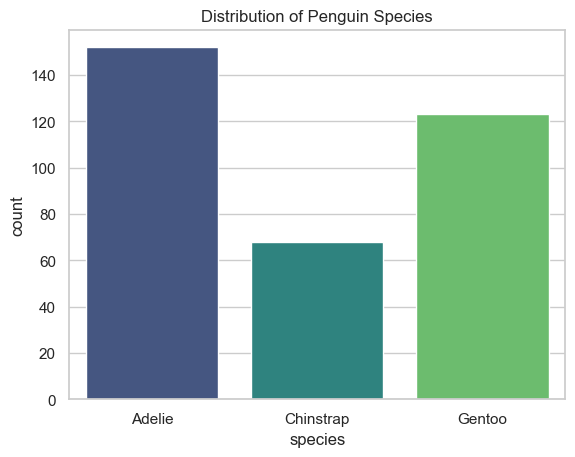

In [7]:
sns.countplot(x='species', data=df, palette='viridis')
plt.title('Distribution of Penguin Species')
plt.show()

### 2. Line Plot

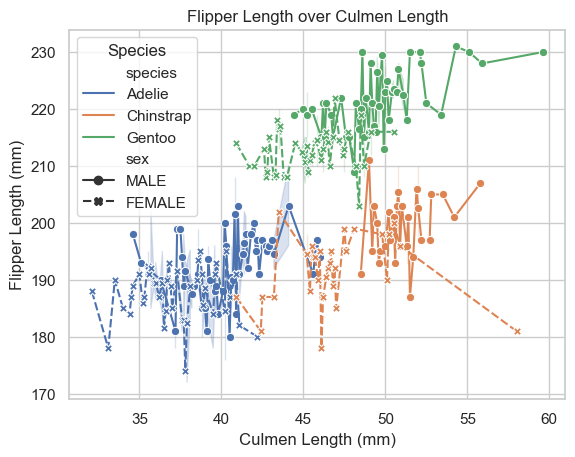

In [8]:
sns.lineplot(x='culmen_length_mm', y='flipper_length_mm', data=df, hue='species', style='sex', markers=True)
plt.title('Flipper Length over Culmen Length')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.legend(title='Species')
plt.show()

### 3. Scatter Plot

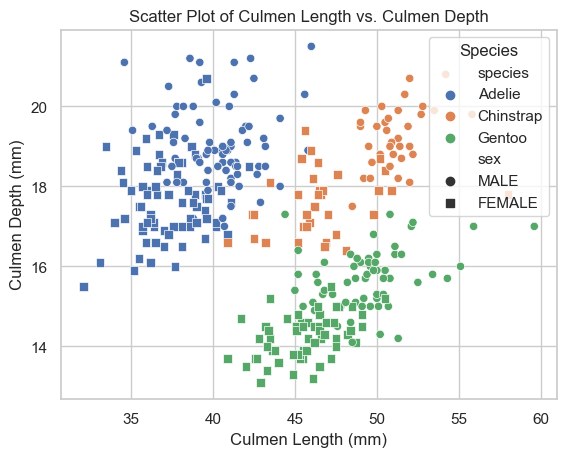

In [9]:
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', data=df, hue='species', style='sex', markers=['o', 's'])
plt.title('Scatter Plot of Culmen Length vs. Culmen Depth')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.legend(title='Species')
plt.show()

### 4. Histogram

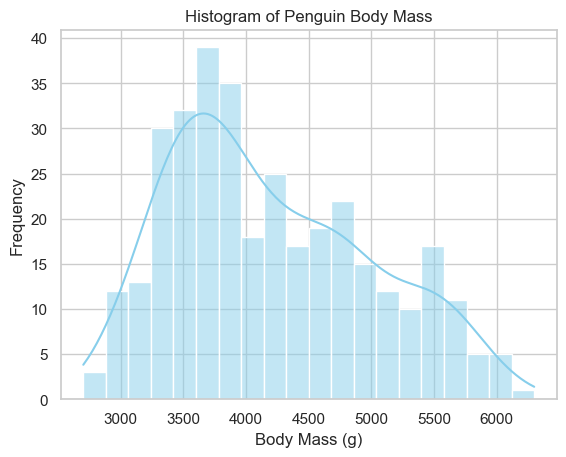

In [10]:
sns.histplot(df['body_mass_g'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Penguin Body Mass')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frequency')
plt.show()

### 5. Box Plot

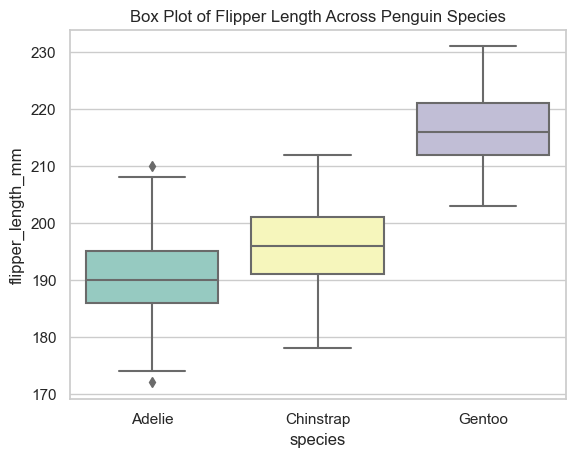

In [11]:
sns.boxplot(x='species', y='flipper_length_mm', data=df, palette='Set3')
plt.title('Box Plot of Flipper Length Across Penguin Species')
plt.show()

### 6. Violin Plot

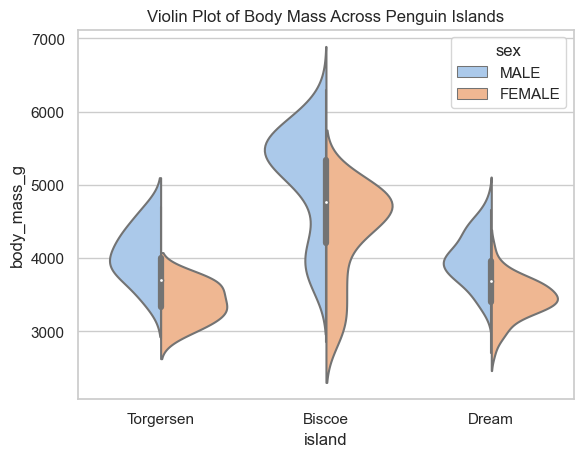

In [12]:
sns.violinplot(x='island', y='body_mass_g', data=df, hue='sex', split=True, palette='pastel')
plt.title('Violin Plot of Body Mass Across Penguin Islands')
plt.show()

### 7. Waterfall Chart

(-1.0, 7.0)

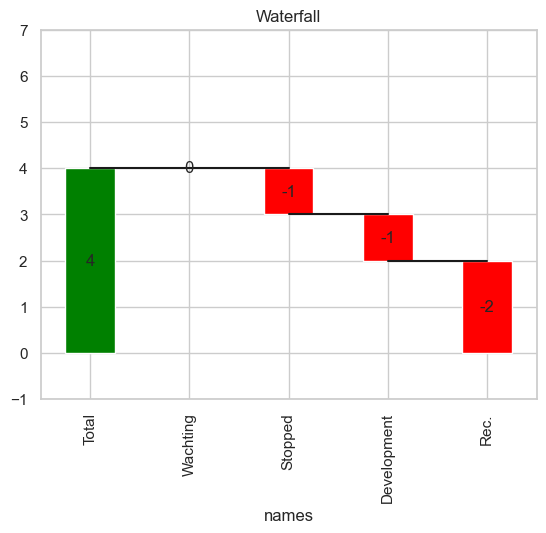

In [13]:
df2 = pd.DataFrame({'orders':[4, 0, -1, -1, -2], 
                   'names':['Total', 'Wachting', 'Stopped', 'Development', 'Rec.']})
colors = df2.orders.apply(lambda x: 'green' if x>0 else 'red')
bottom = df2.orders.cumsum().shift(1).fillna(0)
gap = bottom.reset_index(drop=True).repeat(3).shift(-1)
gap[1::3] = np.nan

fig, ax = plt.subplots()
my_plot = df2.plot.bar(x='names', y='orders', legend=None, bottom=bottom,title="Waterfall", color=colors, ax=ax)
my_plot.plot(gap.index, gap.values,'k')

my_plot.bar_label(ax.containers[0], label_type='center')
my_plot.set_ylim(-1,7)

### 8. Pie Chart

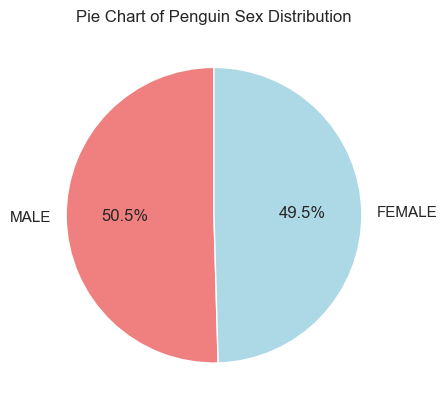

In [14]:
sex_distribution = df['sex'].value_counts()
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Pie Chart of Penguin Sex Distribution')
plt.show()

### 9. Polar Chart

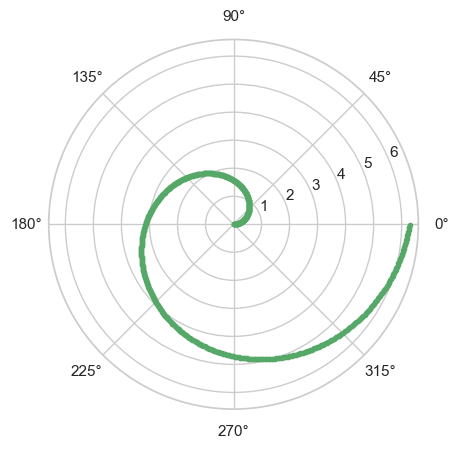

In [19]:
plt.axes(projection = 'polar') 
rads = np.arange(0, 2 * np.pi, 0.01)  
  
for rad in rads: 
    r = rad 
    plt.polar(rad, r, 'g.') 
      
plt.show()

### 10. Bump Chart

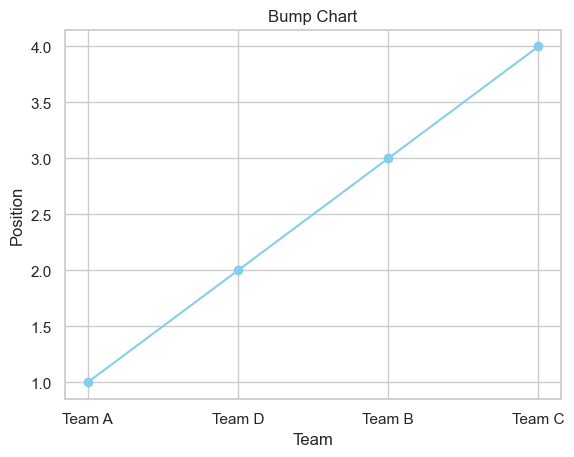

In [16]:
data = {
    'Team': ['Team A', 'Team B', 'Team C', 'Team D'],
    'Position': [1, 3, 4, 2]
}

df_bump = pd.DataFrame(data)
df_bump = df_bump.sort_values(by='Position')

plt.plot(df_bump['Team'], df_bump['Position'], marker='o', linestyle='-', color='skyblue')
plt.title('Bump Chart')
plt.xlabel('Team')
plt.ylabel('Position')
plt.show()

### 11. Contour Plot

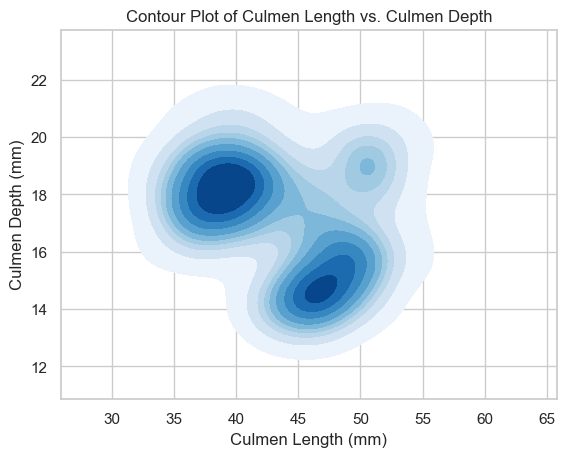

In [20]:
sns.kdeplot(data=df, x='culmen_length_mm', y='culmen_depth_mm', fill=True, cmap='Blues')
plt.title('Contour Plot of Culmen Length vs. Culmen Depth')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.show()

### 12. Correlogram

C:\Users\jaiga\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


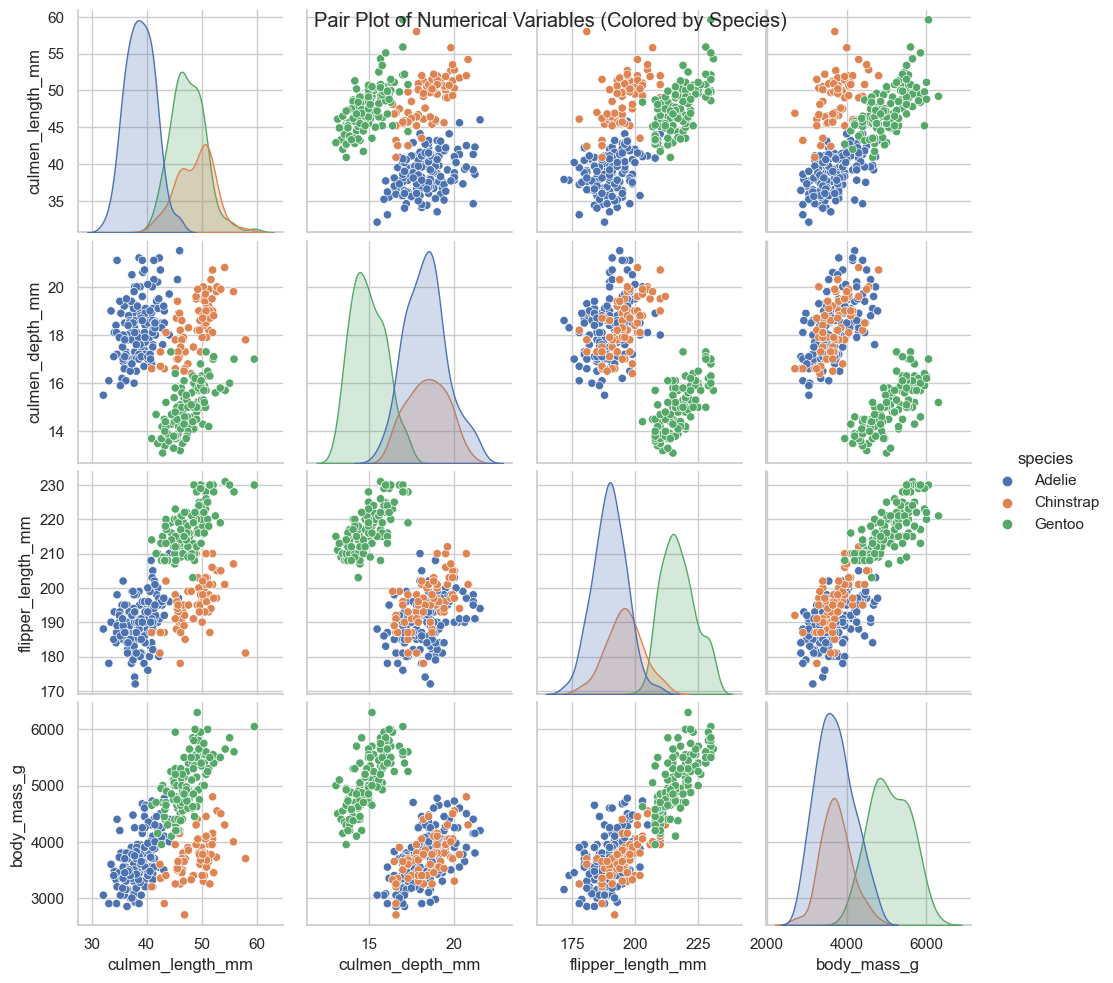

In [23]:
sns.pairplot(df, hue='species', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Variables (Colored by Species)')
plt.show()

### 13. Heat Map

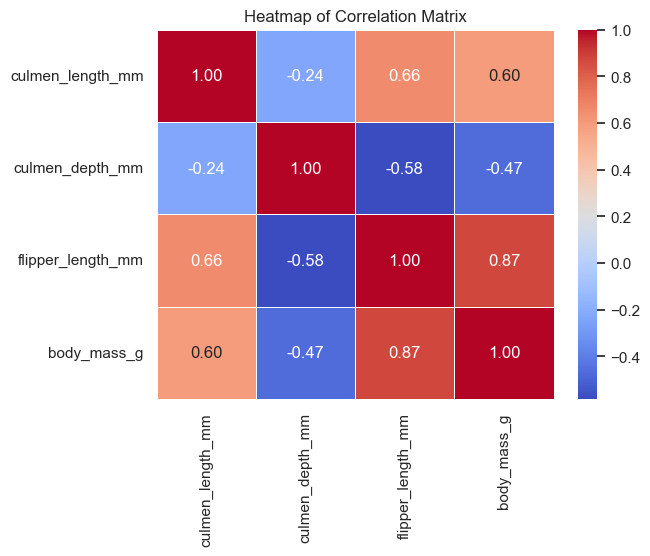

In [24]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

### 14. Ridge Plot

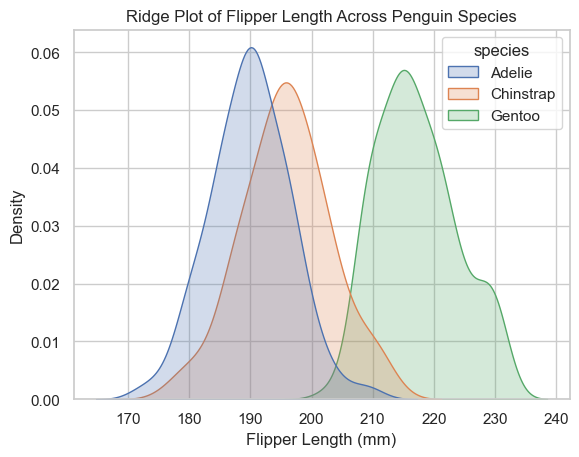

In [25]:
sns.kdeplot(data=df, x='flipper_length_mm', hue='species', fill=True, common_norm=False)
plt.title('Ridge Plot of Flipper Length Across Penguin Species')
plt.xlabel('Flipper Length (mm)')
plt.show()

### 15. Waffle Plot

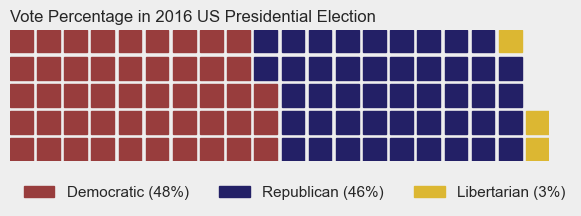

In [29]:
data = {'Democratic': 48, 'Republican': 46, 'Libertarian': 3}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=("#983D3D", "#232066", "#DCB732"),
    title={'label': 'Vote Percentage in 2016 US Presidential Election', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')
plt.show()

### 16. Swarm Plot

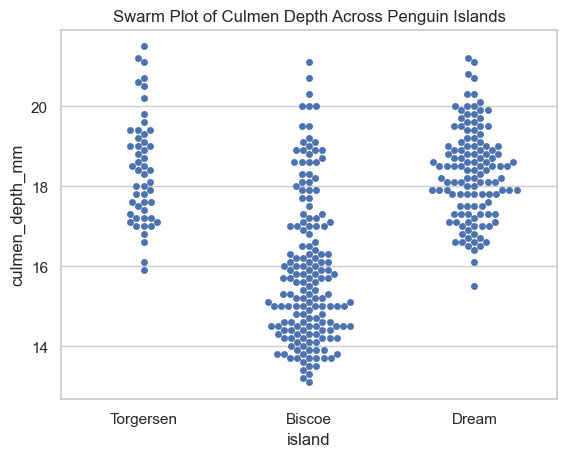

In [30]:
sns.swarmplot(x='island', y='culmen_depth_mm', data=df)
plt.title('Swarm Plot of Culmen Depth Across Penguin Islands')
plt.show()

### 17. Mosaic Plot

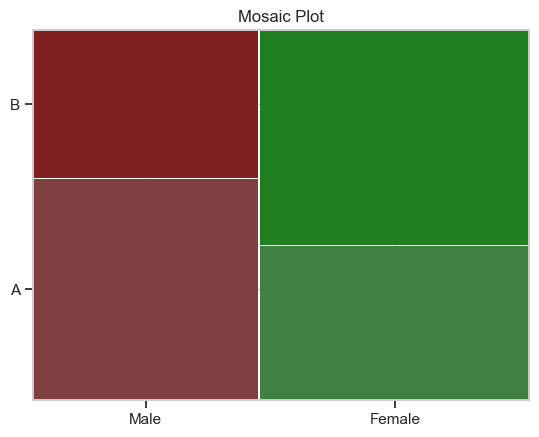

In [39]:
data = {
    ('Male', 'A'): 30,
    ('Male', 'B'): 20,
    ('Female', 'A'): 25,
    ('Female', 'B'): 35,
}

mosaic(data, title='Mosaic Plot', labelizer=lambda k: '')

plt.show()

### 18. Hierarchical Plot

In [43]:
data = {
    'Category1': ['A', 'B', 'C', 'D'],
    'Category2': ['X', 'Y', 'Z', 'W'],
    'Value': [10, 15, 20, 25]
}

df_hierarchy = pd.DataFrame(data)

fig = px.sunburst(df_hierarchy, path=['Category1', 'Category2'], values='Value')
fig.update_layout(title='Hierarchical Plot')
fig.show()

### 19. Hexbin Plot

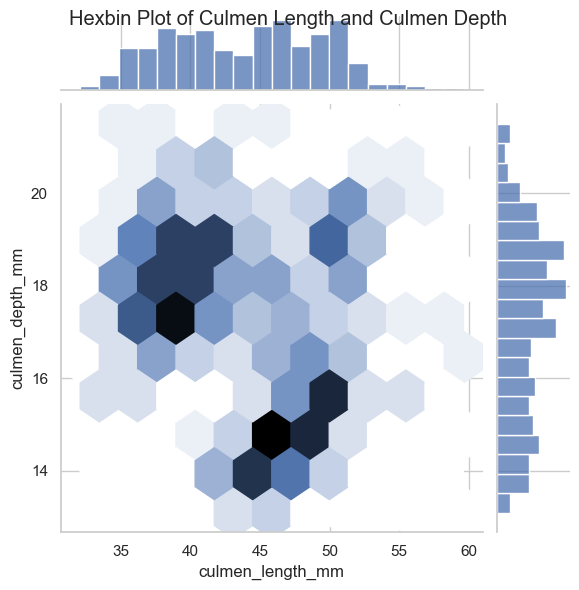

In [44]:
sns.jointplot(x='culmen_length_mm', y='culmen_depth_mm', data=df, kind='hex', marginal_kws=dict(bins=20))
plt.suptitle('Hexbin Plot of Culmen Length and Culmen Depth')
plt.show()

### 20. Donut Plot

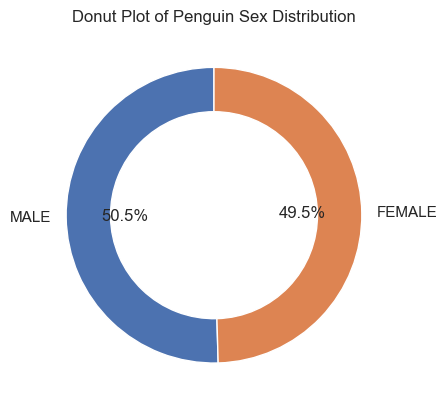

In [45]:
sex_distribution = df['sex'].value_counts()
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.gca().add_artist(plt.Circle((0, 0), 0.2, color='white'))
plt.title('Donut Plot of Penguin Sex Distribution')
plt.show()

### 21. Joint Plot

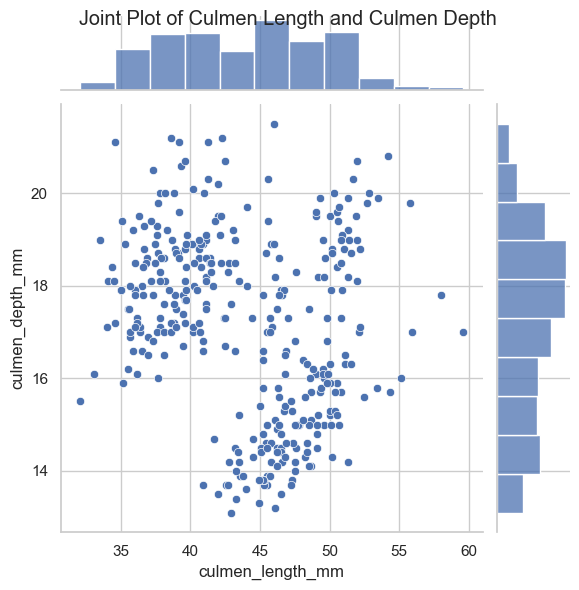

In [46]:
sns.jointplot(x='culmen_length_mm', y='culmen_depth_mm', data=df, kind='scatter')
plt.suptitle('Joint Plot of Culmen Length and Culmen Depth')
plt.show()

# Histogram Function
### Generate histogram for character count in your name

In [47]:
def gen_hist(word: str):
    character_count = {}
    for character in word.lower():
        character_count[character] = character_count.get(character, 0) + 1
    
    characters, counts = zip(*sorted(character_count.items()))

    plt.bar(characters, counts, color='skyblue')
    plt.xlabel('Characters')
    plt.ylabel('Frequency')
    plt.title('Jai Gaurav 21BCE7194')
    plt.show()

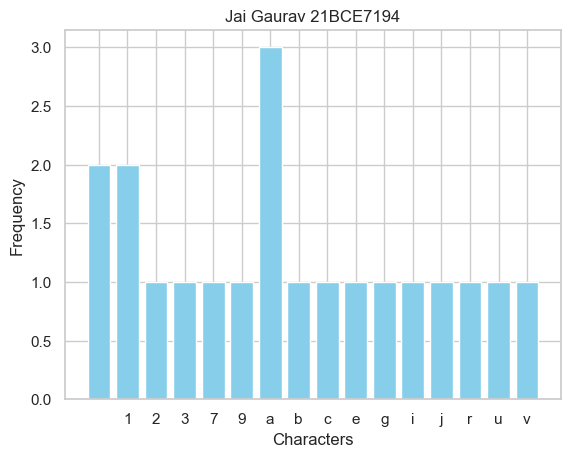

In [48]:
# word = input("Enter a word: ")
word = "Jai Gaurav 21BCE7193"
gen_hist(word)

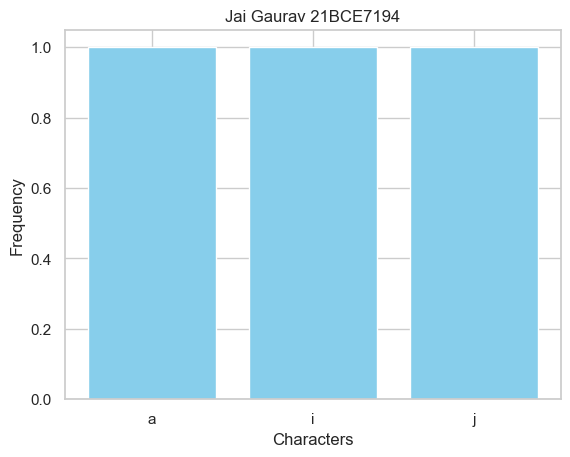

In [49]:
gen_hist("Jai")